## Isotopic Fingerprinting with d15N-AA data

In [228]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Important to think about the question. Originally I was including data from Mompean et al (2016) but I did not do that data and I'm not sure if including it will lead me to where I want to go. Maybe just include d15N-AA data from different deep-sea corals through time and see how they compare?

In [229]:
dataset = pd.read_csv('~/Documents/GitHub/data/schiff global_ncsiaa 02-06-2019.csv')
dataset = dataset[['Sample ID','Group','Ala','Asx','Glx','Ile','Leu','Pro','Val','Phe','Gly','Ser']]
# groups = ['POM']
# dataset = dataset[~dataset.Group.isin(groups)] # Drop unwanted groups
dataset = dataset.dropna() # Drop rows with NaN
dataset = dataset.reset_index()

print(dataset)
dataset.shape

    index        Sample ID               Group    Ala    Asx    Glx    Ile  \
0       0   sav-4902-bc1_2  Leiopathes-ancient  16.14  13.56  14.26  20.67   
1       1   sav-4902-bc1_7  Leiopathes-ancient  20.76  18.95  14.16  24.40   
2       2  sav-4902-bc1_15  Leiopathes-ancient  18.60  14.35  17.29  23.82   
3       3  sav-4902-bc1_33  Leiopathes-ancient  20.64  19.54  16.07  26.18   
4       4  sav-4902-bc1_61  Leiopathes-ancient  21.57  18.74  16.09  23.82   
..    ...              ...                 ...    ...    ...    ...    ...   
67     69         T1100-A4         Isidella-A4  21.30  17.40  20.10  20.90   
68     70         T1100-A4         Isidella-A4  20.80  17.20  20.30  21.50   
69     71         T1100-A4         Isidella-A4  22.60  18.60  21.20  23.10   
70     72         T1100-A4         Isidella-A4  21.70  17.90  20.50  21.20   
71     73         T1100-A4         Isidella-A4  22.60  18.70  19.60  21.60   

      Leu    Pro    Val    Phe    Gly    Ser  
0   19.28  28.84

(72, 13)

In [230]:
traa = ['Ala','Asx','Glx','Ile','Leu','Pro','Val']
srcaa = ['Phe', 'Gly', 'Ser']
aa = traa + srcaa
features = srcaa

# Separating out the features
x = dataset.loc[:, features].values
xmean = x.mean(axis=1, keepdims = True) # Keep shape (72,1) instead of (72,)
x = x - xmean # Normalize to the mean of each row
# Separating out the target
y = dataset.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [231]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [232]:
principalDf

,principal component 1,principal component 2
0,1.127017,3.292512
1,0.240701,0.536911
2,1.242966,0.468809
3,1.380472,-2.037903
4,1.302213,-0.499854
...,...,...
67,-0.402629,0.288015
68,-0.336617,0.331516
69,-0.131892,-0.337846
70,-0.225479,-0.352208


In [233]:
dataset[['Group']]

,Group
0,Leiopathes-ancient
1,Leiopathes-ancient
2,Leiopathes-ancient
3,Leiopathes-ancient
4,Leiopathes-ancient
...,...
67,Isidella-A4
68,Isidella-A4
69,Isidella-A4
70,Isidella-A4


In [234]:
finalDf = pd.concat([principalDf, dataset[['Group']]], axis = 1)
print(finalDf)

finalDf['Group'].unique()

    principal component 1  principal component 2               Group
0                1.127017               3.292512  Leiopathes-ancient
1                0.240701               0.536911  Leiopathes-ancient
2                1.242966               0.468809  Leiopathes-ancient
3                1.380472              -2.037903  Leiopathes-ancient
4                1.302213              -0.499854  Leiopathes-ancient
..                    ...                    ...                 ...
67              -0.402629               0.288015         Isidella-A4
68              -0.336617               0.331516         Isidella-A4
69              -0.131892              -0.337846         Isidella-A4
70              -0.225479              -0.352208         Isidella-A4
71              -0.555542              -0.569714         Isidella-A4

[72 rows x 3 columns]


array(['Leiopathes-ancient', 'Leiopathes-recent', 'Leiopathes-Disk7',
       'Leiopathes-Disk1', 'POM', 'Isidella-A7', 'Isidella-A4'],
      dtype=object)

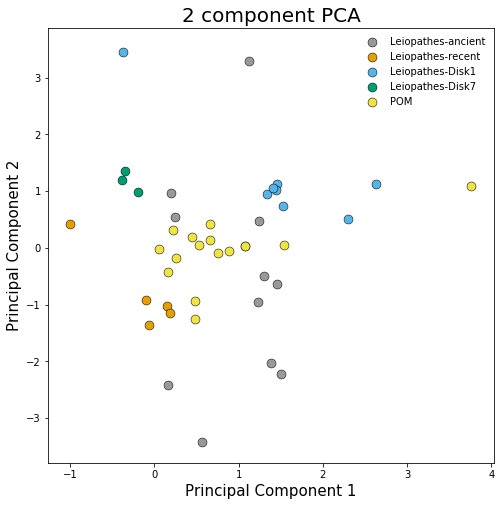

In [235]:
# Visualize 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Leiopathes-ancient','Leiopathes-recent', 'Leiopathes-Disk1', 'Leiopathes-Disk7', 'POM']
colors = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 80,
              linewidths=0.5,
              edgecolors = 'k',
              linestyle = 'None')
    plt.grid('None')
ax.legend(targets, frameon = False)
ax.grid()

In [226]:
pca.explained_variance_ratio_

array([0.59592232, 0.40407768])